In [4]:
import pandas as pd
from sample_weight_audit import weighted_repeated_fit_equivalence_test
import threadpoolctl

threadpoolctl.threadpool_limits(limits=1)
import warnings
warnings.filterwarnings("ignore")

from sklearn import utils
from inspect import signature

ests = utils.all_estimators(type_filter='classifier')

df = []

for est in ests[1:]:
    est = est[1]
    if 'random_state' in signature(est).parameters and 'sample_weight' in signature(est.fit).parameters:
        ## record in dataframe name of estimator, and all pvalues and minimum pvalue and average pvalue
        try:
            df.append(paired_test(est, n_features = 10, test='welch', max_seed=20,
                train_size = 300, n_samples_per_cv_group=500,
                rep_test_size = 20, max_repeats=5, n_classes=8,
                correct_threshold=True, equal_var=False,issparse=False))
        except ValueError:
            print(est, "with different random state led to the same predictions")
        
df = pd.DataFrame(df)
df.sort_values(by=['min_p_value'])



100%|██████████| 20/20 [00:01<00:00, 11.65it/s]


Finished looping till the maximum random state, 20 for estimator <class 'sklearn.ensemble._bagging.BaggingClassifier'> in ---- 1.7738852500915527 s---
Minimum p-values:  5.569062975843453e-05


100%|██████████| 20/20 [00:00<00:00, 158.83it/s]


Finished looping till the maximum random state, 20 for estimator <class 'sklearn.tree._classes.DecisionTreeClassifier'> in ---- 0.15132689476013184 s---
Minimum p-values:  1.0


100%|██████████| 20/20 [00:00<00:00, 2397.77it/s]


Finished looping till the maximum random state, 20 for estimator <class 'sklearn.dummy.DummyClassifier'> in ---- 0.03084421157836914 s---
Minimum p-values:  1.0


100%|██████████| 20/20 [00:00<00:00, 507.52it/s]


Finished looping till the maximum random state, 20 for estimator <class 'sklearn.tree._classes.ExtraTreeClassifier'> in ---- 0.06129097938537598 s---
Minimum p-values:  1.0


100%|██████████| 20/20 [00:03<00:00,  6.08it/s]


Finished looping till the maximum random state, 20 for estimator <class 'sklearn.ensemble._forest.ExtraTreesClassifier'> in ---- 3.39034104347229 s---
Minimum p-values:  1.0


100%|██████████| 20/20 [00:39<00:00,  1.99s/it]


Finished looping till the maximum random state, 20 for estimator <class 'sklearn.ensemble._gb.GradientBoostingClassifier'> in ---- 40.565723180770874 s---
Minimum p-values:  0.0335416594061465


100%|██████████| 20/20 [00:25<00:00,  1.29s/it]


Finished looping till the maximum random state, 20 for estimator <class 'sklearn.ensemble._hist_gradient_boosting.gradient_boosting.HistGradientBoostingClassifier'> in ---- 26.59323787689209 s---
Minimum p-values:  1.4508889103849681e-11


100%|██████████| 20/20 [00:07<00:00,  2.57it/s]


Finished looping till the maximum random state, 20 for estimator <class 'sklearn.svm._classes.LinearSVC'> in ---- 7.895606994628906 s---
Minimum p-values:  5.803555641539872e-10


100%|██████████| 20/20 [00:05<00:00,  3.56it/s]


Finished looping till the maximum random state, 20 for estimator <class 'sklearn.linear_model._logistic.LogisticRegression'> in ---- 5.772161245346069 s---
Minimum p-values:  5.803555641539872e-10


100%|██████████| 20/20 [27:22<00:00, 82.14s/it]


Finished looping till the maximum random state, 20 for estimator <class 'sklearn.linear_model._logistic.LogisticRegressionCV'> in ---- 1666.9031522274017 s---
Minimum p-values:  0.001115801546231492


100%|██████████| 20/20 [00:02<00:00,  9.91it/s]


<class 'sklearn.svm._classes.NuSVC'> with different random state led to the same predictions


100%|██████████| 20/20 [00:00<00:00, 138.72it/s]


Finished looping till the maximum random state, 20 for estimator <class 'sklearn.linear_model._perceptron.Perceptron'> in ---- 0.17142796516418457 s---
Minimum p-values:  1.4508889103849681e-11


100%|██████████| 20/20 [00:06<00:00,  2.87it/s]


Finished looping till the maximum random state, 20 for estimator <class 'sklearn.ensemble._forest.RandomForestClassifier'> in ---- 7.107722043991089 s---
Minimum p-values:  9.54696510144592e-06


100%|██████████| 20/20 [00:00<00:00, 36.37it/s]


Finished looping till the maximum random state, 20 for estimator <class 'sklearn.linear_model._ridge.RidgeClassifier'> in ---- 0.5840630531311035 s---
Minimum p-values:  0.0002704973445409677


100%|██████████| 20/20 [00:00<00:00, 30.38it/s]


Finished looping till the maximum random state, 20 for estimator <class 'sklearn.linear_model._stochastic_gradient.SGDClassifier'> in ---- 0.6907970905303955 s---
Minimum p-values:  1.4508889103849681e-11


100%|██████████| 20/20 [00:00<00:00, 20.02it/s]

<class 'sklearn.svm._classes.SVC'> with different random state led to the same predictions


,Name,p_values,min_p_value,avg_p_value
6,HistGradientBoostingClassifier,"[9.54696510144592e-06, 5.569062975843453e-05, ...",1.450889e-11,1.894636e-03
10,Perceptron,"[1.4508889103849681e-11, 1.4508889103849681e-1...",1.450889e-11,1.823042e-09
13,SGDClassifier,"[1.4508889103849681e-11, 1.4508889103849681e-1...",1.450889e-11,1.450889e-11
7,LinearSVC,"[1.4334782434603487e-07, 1.3259673752008224e-0...",5.803556e-10,7.686867e-07
8,LogisticRegression,"[0.0335416594061465, 1.4334782434603487e-07, 0...",5.803556e-10,1.941775e-03
11,RandomForestClassifier,"[0.17453300569806826, 0.00396729438660086, 0.0...",9.546965e-06,6.081961e-02
0,BaggingClassifier,"[0.17453300569806826, 0.012298612583953778, 5....",5.569063e-05,2.916947e-01
12,RidgeClassifier,"[0.0335416594061465, 0.0335416594061465, 0.033...",2.704973e-04,1.102806e-01
9,LogisticRegressionCV,"[0.012298612583953778, 0.012298612583953778, 0...",1.115802e-03,1.284310e-02
5,GradientBoostingClassifier,"[0.33559098126008213, 0.17453300569806826, 0.0...",3.354166e-02,2.650343e-01


In [33]:
from sklearn.ensemble import RandomTreesEmbedding
from sklearn.datasets import make_blobs, make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import numpy as np

centres = np.array([[0, 0], [0, 5], [3, 1], [2, 4], [100, 8]])
#X, _ = make_blobs(
#        n_samples=300,
#        cluster_std=0.5,
#        centers=centres,
#        random_state=10,
#    )

X, y = make_classification(
            n_samples=300,
            n_features=10,
            random_state=10,
            n_informative=4,
            n_classes=8,
        )
#y = RandomTreesEmbedding().fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
        X, y, train_size=200, random_state=42
    )
rng = np.random.RandomState(42)
sample_weight = rng.randint(0, 5, size=X_train.shape[0])
X_resampled_by_weights = np.repeat(X_train, sample_weight, axis=0)
y_resampled_by_weights = np.repeat(y_train, sample_weight, axis=0)

est_w = LogisticRegression().fit(X_train,y_train,sample_weight=sample_weight)
est_r = LogisticRegression().fit(X_resampled_by_weights,y_resampled_by_weights)


In [34]:
preds_w = est_w.predict_proba(X_test)
preds_r = est_r.predict_proba(X_test)

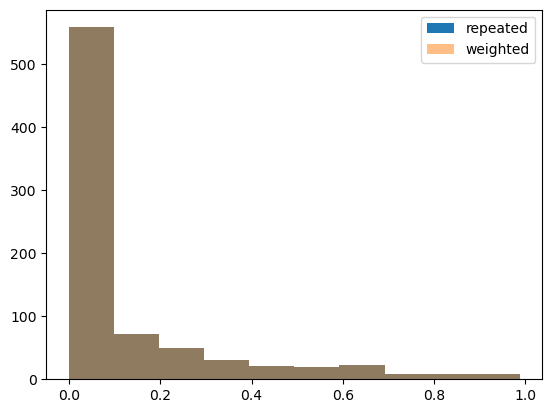

In [43]:
from sklearn.decomposition import PCA
from sklearn.random_projection import GaussianRandomProjection
import matplotlib.pyplot as plt

n = 8

preds_w_pca = PCA(n_components=n).fit_transform(preds_w)
preds_r_pca = PCA(n_components=n).fit_transform(preds_r)

comps = GaussianRandomProjection(n_components=n).fit(preds_w).components_.T

preds_w_gp = preds_w@comps
preds_r_gp = preds_r@comps


plt.hist(preds_r.flatten(),label="repeated")
plt.hist(preds_w.flatten(),alpha=0.5,label="weighted")

plt.legend()







In [40]:
preds_r_gp.shape

(100, 2)